# Task 3 - Modeling



## Section 1 - Setup

First, we need to ensure all the libraries to be installed and properly working

We want to use dataframes once again to store and manipulate the data.

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## Section 2 - Data loading

Now let's load the three datasets to continue working on

In [421]:
sales_df = pd.read_csv("sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

transaction_id  ... payment_type
0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  ...     e-wallet
1  931ad550-09e8-4da6-beaa-8c9d17be9c60  ...     e-wallet
2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  ...     e-wallet
3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  ...     e-wallet
4  a81a6cd3-5e0c-44a2-826c-aea43e46c514  ...   debit card

[5 rows x 9 columns]

In [422]:
stock_df = pd.read_csv("sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

id  ... estimated_stock_pct
0  4220e505-c247-478d-9831-6b9f87a4488a  ...                0.75
1  f2612b26-fc82-49ea-8940-0751fdd4d9ef  ...                0.48
2  989a287f-67e6-4478-aa49-c3a35dac0e2e  ...                0.58
3  af8e5683-d247-46ac-9909-1a77bdebefb2  ...                0.79
4  08a32247-3f44-4002-85fb-c198434dd4bb  ...                0.22

[5 rows x 4 columns]

In [423]:
temp_df = pd.read_csv("sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

id            timestamp  temperature
0  d1ca1ef8-0eac-42fc-af80-97106efc7b13  2022-03-07 15:55:20         2.96
1  4b8a66c4-0f3a-4f16-826f-8cf9397e9d18  2022-03-01 09:18:22         1.88
2  3d47a0c7-1e72-4512-812f-b6b5d8428cf3  2022-03-04 15:12:26         1.78
3  9500357b-ce15-424a-837a-7677b386f471  2022-03-02 12:30:42         2.18
4  c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa  2022-03-05 09:09:33         1.38

## Section 3 - Data Cleaning

Now, we will look for cleaning data. We have to check null values plus datatypes of columns to ensure more cleaned data



First we will check for info() method for the sales data and checking null values

In [424]:
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [425]:
sales_df.isna().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

Now checking for stock data

In [426]:
stock_df.isna().sum()

id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

In [427]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


Lastly, we msut check for temperature data

In [428]:
temp_df.isna().sum()

id             0
timestamp      0
temperature    0
dtype: int64

In [429]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


**One important Thing:** The timestamp in the three tables have datatype object which is not suitable since we will be merging the tables on next step on the basis of timestamp. So it's important to have timestamp feature in proper datatype in all the three datasets

In [430]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%dT%H:%M:%S.%f')
  return dummy

In [431]:
sales_df = convert_to_datetime(sales_df, "timestamp")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [432]:
stock_df = convert_to_datetime(stock_df, 'timestamp')
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [433]:
stock_df

id  ... estimated_stock_pct
0      4220e505-c247-478d-9831-6b9f87a4488a  ...                0.75
1      f2612b26-fc82-49ea-8940-0751fdd4d9ef  ...                0.48
2      989a287f-67e6-4478-aa49-c3a35dac0e2e  ...                0.58
3      af8e5683-d247-46ac-9909-1a77bdebefb2  ...                0.79
4      08a32247-3f44-4002-85fb-c198434dd4bb  ...                0.22
...                                     ...  ...                 ...
14995  b9bf6788-09f3-490b-959b-dc5b55edb4b6  ...                0.66
14996  9ff1cc01-020f-491a-bafd-13552dccff44  ...                0.99
14997  4d8101de-e8a2-4af9-9764-7a3a22aa7084  ...                0.72
14998  5f2a7b1e-b3c4-4395-8425-c960e22f701d  ...                0.95
14999  af6f4493-e49d-4dcb-951d-308e6cce267b  ...                0.75

[15000 rows x 4 columns]

In [434]:
temp_df = convert_to_datetime(temp_df, 'timestamp')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


In [435]:
temp_df['timestamp']

0       2022-03-07 15:55:20
1       2022-03-01 09:18:22
2       2022-03-04 15:12:26
3       2022-03-02 12:30:42
4       2022-03-05 09:09:33
                ...        
23885   2022-03-01 10:40:43
23886   2022-03-05 17:07:49
23887   2022-03-01 16:15:41
23888   2022-03-07 14:44:52
23889   2022-03-01 16:33:41
Name: timestamp, Length: 23890, dtype: datetime64[ns]

Now it looks better!

## Section 4 - Data Merging

Now we have three tables in our RAM. We need to merge these tables somehow to reach to our goal. Lets take a look at our goal what client says:

    “Can we accurately predict the stock levels of products based on sales data and sensor data on an hourly basis in order to more intelligently procure products from our suppliers?” 
    
From the above statement, it is clear that client wants us to build the model which predicts the stock levels on **Hourly basis**. 

But for hourly basis, we would need out timestamp feature to be supported to only hours, minutes and seconds must be zero. Necessarily, we would define a function to ensure the timestamp column is shown on hourly basis.

In [436]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

Now we would transform the sales, stock and temperature dataframes accordngly.

In [437]:
sales_df = convert_timestamp_to_hourly(sales_df, "timestamp")
sales_df.head()

transaction_id           timestamp  ... total payment_type
0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed 2022-03-02 09:00:00  ...  7.98     e-wallet
1  931ad550-09e8-4da6-beaa-8c9d17be9c60 2022-03-06 10:00:00  ...  3.99     e-wallet
2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea 2022-03-04 17:00:00  ...  0.38     e-wallet
3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4 2022-03-02 17:00:00  ...  0.76     e-wallet
4  a81a6cd3-5e0c-44a2-826c-aea43e46c514 2022-03-05 14:00:00  ...  8.98   debit card

[5 rows x 9 columns]

In [438]:
stock_df = convert_timestamp_to_hourly(stock_df, 'timestamp')
stock_df.head()

id  ... estimated_stock_pct
0  4220e505-c247-478d-9831-6b9f87a4488a  ...                0.75
1  f2612b26-fc82-49ea-8940-0751fdd4d9ef  ...                0.48
2  989a287f-67e6-4478-aa49-c3a35dac0e2e  ...                0.58
3  af8e5683-d247-46ac-9909-1a77bdebefb2  ...                0.79
4  08a32247-3f44-4002-85fb-c198434dd4bb  ...                0.22

[5 rows x 4 columns]

In [439]:
temp_df = convert_timestamp_to_hourly(temp_df, 'timestamp')
temp_df.head()

id           timestamp  temperature
0  d1ca1ef8-0eac-42fc-af80-97106efc7b13 2022-03-07 15:00:00         2.96
1  4b8a66c4-0f3a-4f16-826f-8cf9397e9d18 2022-03-01 09:00:00         1.88
2  3d47a0c7-1e72-4512-812f-b6b5d8428cf3 2022-03-04 15:00:00         1.78
3  9500357b-ce15-424a-837a-7677b386f471 2022-03-02 12:00:00         2.18
4  c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa 2022-03-05 09:00:00         1.38

Now the timestamp columns in the three tables have been properly converted to hourly basis, we would begin to merging the tables.

First, we will get the aggregate of quantity sales data grouped by product id and timestamp to ensure the total quantity rather than just separate rows.

In [440]:
sales_agg = pd.DataFrame(sales_df.groupby(['timestamp', 'product_id'])['quantity'].sum().reset_index())
sales_agg

timestamp                            product_id  quantity
0    2022-03-01 09:00:00  00e120bb-89d6-4df5-bc48-a051148e3d03         3
1    2022-03-01 09:00:00  01f3cdd9-8e9e-4dff-9b5c-69698a0388d0         3
2    2022-03-01 09:00:00  03a2557a-aa12-4add-a6d4-77dc36342067         3
3    2022-03-01 09:00:00  049b2171-0eeb-4a3e-bf98-0c290c7821da         7
4    2022-03-01 09:00:00  04da844d-8dba-4470-9119-e534d52a03a0        11
...                  ...                                   ...       ...
6212 2022-03-07 19:00:00  edf4ac93-4e14-4a3d-8c60-e715210cf3f9         3
6213 2022-03-07 19:00:00  f01b189c-6345-4639-a8d1-89e1fc67c443         3
6214 2022-03-07 19:00:00  f3bec808-bee0-4597-a129-53a3a2805a43         2
6215 2022-03-07 19:00:00  fd66ac0b-3498-4613-8ec0-764686b0d864         1
6216 2022-03-07 19:00:00  fd77b5cb-498c-40ca-95d1-0f87f13dd0d8         1

[6217 rows x 3 columns]

We have combined the rows containing quantites for the same product_id for the same timestamp that muliple customers bought.

Now we will aggregate the estimated stock level of stock dataframe by finding the mean.

In [441]:
stock_agg = stock_df.groupby(['timestamp', 'product_id'])[['estimated_stock_pct']].mean().reset_index()
stock_agg

timestamp  ... estimated_stock_pct
0     2022-03-01 09:00:00  ...                0.89
1     2022-03-01 09:00:00  ...                0.14
2     2022-03-01 09:00:00  ...                0.67
3     2022-03-01 09:00:00  ...                0.82
4     2022-03-01 09:00:00  ...                0.05
...                   ...  ...                 ...
10840 2022-03-07 19:00:00  ...                0.50
10841 2022-03-07 19:00:00  ...                0.26
10842 2022-03-07 19:00:00  ...                0.78
10843 2022-03-07 19:00:00  ...                0.92
10844 2022-03-07 19:00:00  ...                0.01

[10845 rows x 3 columns]

Based on the aggregate of stock level percentage, we can combined the similar rows. Same thing goes to the temperature feature of the temperature dataframe.

We will find the aggregate mean of temperature feature in temperature data grouped by timestamp. We will not inlcude id, since that is not product id.

In [442]:
temp_agg = temp_df.groupby(['timestamp'])['temperature'].sum().reset_index()
temp_agg

timestamp  temperature
0  2022-03-01 09:00:00        -9.03
1  2022-03-01 10:00:00       393.00
2  2022-03-01 11:00:00      -171.92
3  2022-03-01 12:00:00      -158.09
4  2022-03-01 13:00:00       -59.64
..                 ...          ...
72 2022-03-07 15:00:00      -311.47
73 2022-03-07 16:00:00       -69.42
74 2022-03-07 17:00:00        -1.30
75 2022-03-07 18:00:00       120.04
76 2022-03-07 19:00:00       -53.32

[77 rows x 2 columns]

This gives us the aggregated temperature of each time stamp on hourly basis accross the different warehouses. 

Now we will will merge the three tables by keeping the table stock_df as our base table. We will join the tables on matching values of timestamp values.

In [443]:
merged_df = stock_agg.merge(sales_agg, on=['product_id', 'timestamp'], how='left')
merged_df

timestamp  ... quantity
0     2022-03-01 09:00:00  ...      3.0
1     2022-03-01 09:00:00  ...      3.0
2     2022-03-01 09:00:00  ...      NaN
3     2022-03-01 09:00:00  ...      NaN
4     2022-03-01 09:00:00  ...      NaN
...                   ...  ...      ...
10840 2022-03-07 19:00:00  ...      4.0
10841 2022-03-07 19:00:00  ...      NaN
10842 2022-03-07 19:00:00  ...      3.0
10843 2022-03-07 19:00:00  ...      3.0
10844 2022-03-07 19:00:00  ...      2.0

[10845 rows x 4 columns]

In [444]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df

timestamp  ... temperature
0     2022-03-01 09:00:00  ...       -9.03
1     2022-03-01 09:00:00  ...       -9.03
2     2022-03-01 09:00:00  ...       -9.03
3     2022-03-01 09:00:00  ...       -9.03
4     2022-03-01 09:00:00  ...       -9.03
...                   ...  ...         ...
10840 2022-03-07 19:00:00  ...      -53.32
10841 2022-03-07 19:00:00  ...      -53.32
10842 2022-03-07 19:00:00  ...      -53.32
10843 2022-03-07 19:00:00  ...      -53.32
10844 2022-03-07 19:00:00  ...      -53.32

[10845 rows x 5 columns]

Let's ensure the column types and check the null values if any exist.

In [445]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [446]:
merged_df.isna().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
temperature               0
dtype: int64

By taking a look at `info()` and `isna()` methods, we can see that there are mssing values in our dataframe. We will keep them as we don't want to clean them now. we will add the other features with mathcing number of rows with other dataframe.

Now we can add more features like `unit_price` and `category` to our merged table. This will add more robhustness to our model we will be training. We will define a temporary table to merge with our table `merged_df`.

In [447]:
categories = sales_df[['product_id','category', 'unit_price']].drop_duplicates()
merged_data = merged_df.merge(categories, on='product_id', how='left')
merged_data

timestamp  ... unit_price
0     2022-03-01 09:00:00  ...      11.19
1     2022-03-01 09:00:00  ...       1.49
2     2022-03-01 09:00:00  ...      14.19
3     2022-03-01 09:00:00  ...      20.19
4     2022-03-01 09:00:00  ...       8.19
...                   ...  ...        ...
10840 2022-03-07 19:00:00  ...       4.99
10841 2022-03-07 19:00:00  ...      19.99
10842 2022-03-07 19:00:00  ...       6.99
10843 2022-03-07 19:00:00  ...      14.99
10844 2022-03-07 19:00:00  ...       5.19

[10845 rows x 7 columns]

We have added two new features `category` and 'unit_price'. Our table is now more featured. But wait on! We have null values in our table. We will drop them.

In [448]:
merged_data = merged_data.dropna()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3067 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            3067 non-null   datetime64[ns]
 1   product_id           3067 non-null   object        
 2   estimated_stock_pct  3067 non-null   float64       
 3   quantity             3067 non-null   float64       
 4   temperature          3067 non-null   float64       
 5   category             3067 non-null   object        
 6   unit_price           3067 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 191.7+ KB


As we can ensure, now our table is free of errors.

## Section 5 - Feature Engineering

It's time for feature engineering. In our table, we have non-numeric features, such as `category`, we will change the each value of `category` with corresponding suitable numeric value. Values like 1, 2, 3, 4, etc. will be most suitable in this case.

First we will explore the types of values in `category` feature.

In [449]:
unique_category = merged_data['category'].unique()
unique_category

array(['kitchen', 'vegetables', 'fruit', 'baking', 'dairy',
       'packaged foods', 'baked goods', 'refrigerated items', 'meat',
       'personal care', 'beverages', 'baby products', 'pets',
       'condiments and sauces', 'frozen', 'cheese', 'canned foods',
       'seafood', 'medicine', 'snacks', 'cleaning products',
       'spices and herbs'], dtype=object)

Now we have to replace these values with some numeric values.

In [450]:
merged_data['category'] = merged_data['category'].replace(unique_category,list(range(1, len(unique_category) + 1)) )
merged_data['category']

0         1
1         2
8         3
13        4
14        3
         ..
10837     9
10840     3
10842     6
10843     9
10844    11
Name: category, Length: 3067, dtype: int64

The column `category` has successfully been changed into numeric.

Note that we have only `3067` rows, that is very low number. Therefore, it is suitable to take random sample of dataframe with replacment `Ten Thousand` times. This will add more robhustness to our model and the more data size, the more accurate model is.

In [451]:
data = merged_data.sample(10000, replace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1286 to 10738
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10000 non-null  datetime64[ns]
 1   product_id           10000 non-null  object        
 2   estimated_stock_pct  10000 non-null  float64       
 3   quantity             10000 non-null  float64       
 4   temperature          10000 non-null  float64       
 5   category             10000 non-null  int64         
 6   unit_price           10000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 625.0+ KB


Now we should look for features we don't need:

1. `product_id`
2. `timestamp`

We should delete this as we will not be longer needing these features.

In [452]:
data = data.drop(columns=['product_id', 'timestamp'])
data

estimated_stock_pct  quantity  temperature  category  unit_price
1286              0.960000       4.0      -413.14         6        7.19
1312              0.735000       1.0      -413.14        19       11.49
10747             0.393333       3.0       -53.32         5        9.49
7602              0.560000       2.0        55.55        13        8.19
1507              0.120000       3.0       146.40         4        2.19
...                    ...       ...          ...       ...         ...
502               0.795000       4.0      -158.09         7        4.99
9242              0.970000       1.0       -22.61         2        1.99
5630              0.320000       2.0      -224.71        15       13.19
2688              0.405000       1.0      -122.27        18       12.99
10738             0.880000       2.0       -53.32         8        6.49

[10000 rows x 5 columns]

Now we have successfully prepared our table. Now it's time for the model Training.

---

## Section 5 - Model Training

Now it's time for model training. Since we will be predicting the stocks levels, we must select `estimated_stock_pct` as our target variable. The target variable is a continuous feature, therefore we will be using regression for our prediction.

We will be using statsmodels to train the model, selecting multiple regression as our strategy to predict by the model. Let's split our model to 75%25% and train model several times to ensure consistent `Mean Absolute Error`.

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

Iteration1: MAE = 0.219
0.011027770028425254
Iteration2: MAE = 0.215
0.003354684266079544
Iteration3: MAE = 0.215
0.009970904961438376
Iteration4: MAE = 0.214
0.006756634149679863
Iteration5: MAE = 0.215
0.012210556830086983
Iteration6: MAE = 0.210
0.01806017803598492
Iteration7: MAE = 0.214
0.016406321925715672
Iteration8: MAE = 0.215
0.013492305228497758
Iteration9: MAE = 0.220
0.012549197236063403
Iteration10: MAE = 0.211
0.012741437763222452
Average MAE: 0.21


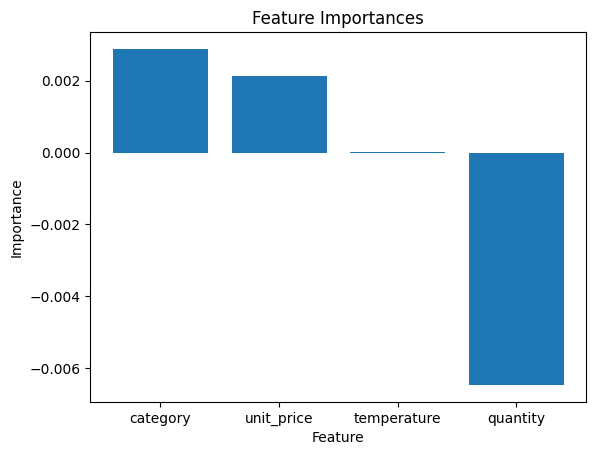

In [466]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

accuracy = []
importances = []

for i in range(0, 10):
    
    holdout = int(0.30 * len(data))
    data = data.sample(frac=1, replace=True)
    testing = pd.DataFrame(data[:holdout])
    training = pd.DataFrame(data[holdout:])

    model =  smf.ols('estimated_stock_pct ~ + quantity + temperature + category + unit_price', data=training).fit()
    X_test = testing[['quantity', 'temperature', 'category', 'unit_price']]
    Y_test = testing['estimated_stock_pct']

    predictions = model.predict(X_test)

    # Compute accuracy, using mean absolute error
    mae = mean_absolute_error(y_true=Y_test, y_pred=predictions)
    accuracy.append(mae)
    print(f"Iteration{i + 1}: MAE = {mae:.3f}")
    print(r2_score(Y_test, predictions))
    
    # Compute feature importances
    importances_df = pd.DataFrame({'feature': ['quantity', 'temperature', 'category', 'unit_price'], 'importance': model.params[1:]})
    importances.append(importances_df)

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

# Plot feature importances
importances_df = pd.concat(importances)
importances_df = importances_df.groupby('feature').mean().reset_index()
importances_df = importances_df.sort_values('importance', ascending=False)

plt.bar(importances_df['feature'], importances_df['importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

### Result:
As we can see that our `MAE` is almost consistent among iterations with average MAE: `0.22`. This ensures the minimum error in our model, and is now redy to be deployed.

However, the feature importances show that the features like `quantity` have negative importance, plus `temperature` variable has no importance. The `category` and `unit_price` have much importance. 

We report back to our business.